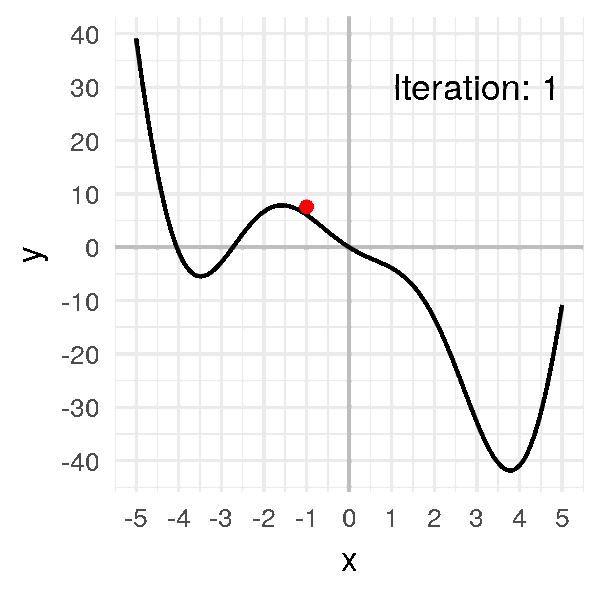

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# GD

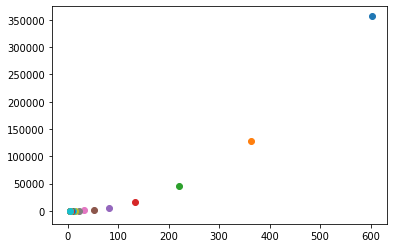

In [92]:
x=np.linspace(4,6,20)
y=(x-5)**2
plt.scatter(x,y,color="black")
starting_point=1000
updated_point=starting_point
l=[]
for i in range(100):
    eta=-0.2
    updated_point=updated_point+eta*2*(updated_point-5)
    l.append(updated_point)
    plt.scatter(updated_point,(updated_point-5)**2)
    

In [93]:
l

[602.0,
 363.2,
 219.92,
 133.952,
 82.37119999999999,
 51.42271999999999,
 32.85363199999999,
 21.712179199999994,
 15.027307519999997,
 11.016384511999998,
 8.609830707199999,
 7.165898424319999,
 6.299539054592,
 5.779723432755199,
 5.46783405965312,
 5.280700435791871,
 5.168420261475123,
 5.101052156885074,
 5.060631294131045,
 5.036378776478627,
 5.021827265887176,
 5.013096359532306,
 5.007857815719384,
 5.004714689431631,
 5.0028288136589785,
 5.001697288195387,
 5.001018372917232,
 5.00061102375034,
 5.000366614250204,
 5.000219968550122,
 5.000131981130074,
 5.000079188678044,
 5.000047513206827,
 5.000028507924096,
 5.000017104754457,
 5.000010262852674,
 5.000006157711605,
 5.000003694626963,
 5.000002216776178,
 5.0000013300657065,
 5.000000798039424,
 5.0000004788236545,
 5.000000287294193,
 5.000000172376516,
 5.00000010342591,
 5.000000062055546,
 5.0000000372333275,
 5.0000000223399965,
 5.000000013403998,
 5.000000008042399,
 5.00000000482544,
 5.000000002895264,
 5.0

In [6]:
#linear reg implement 

# perceptron 

 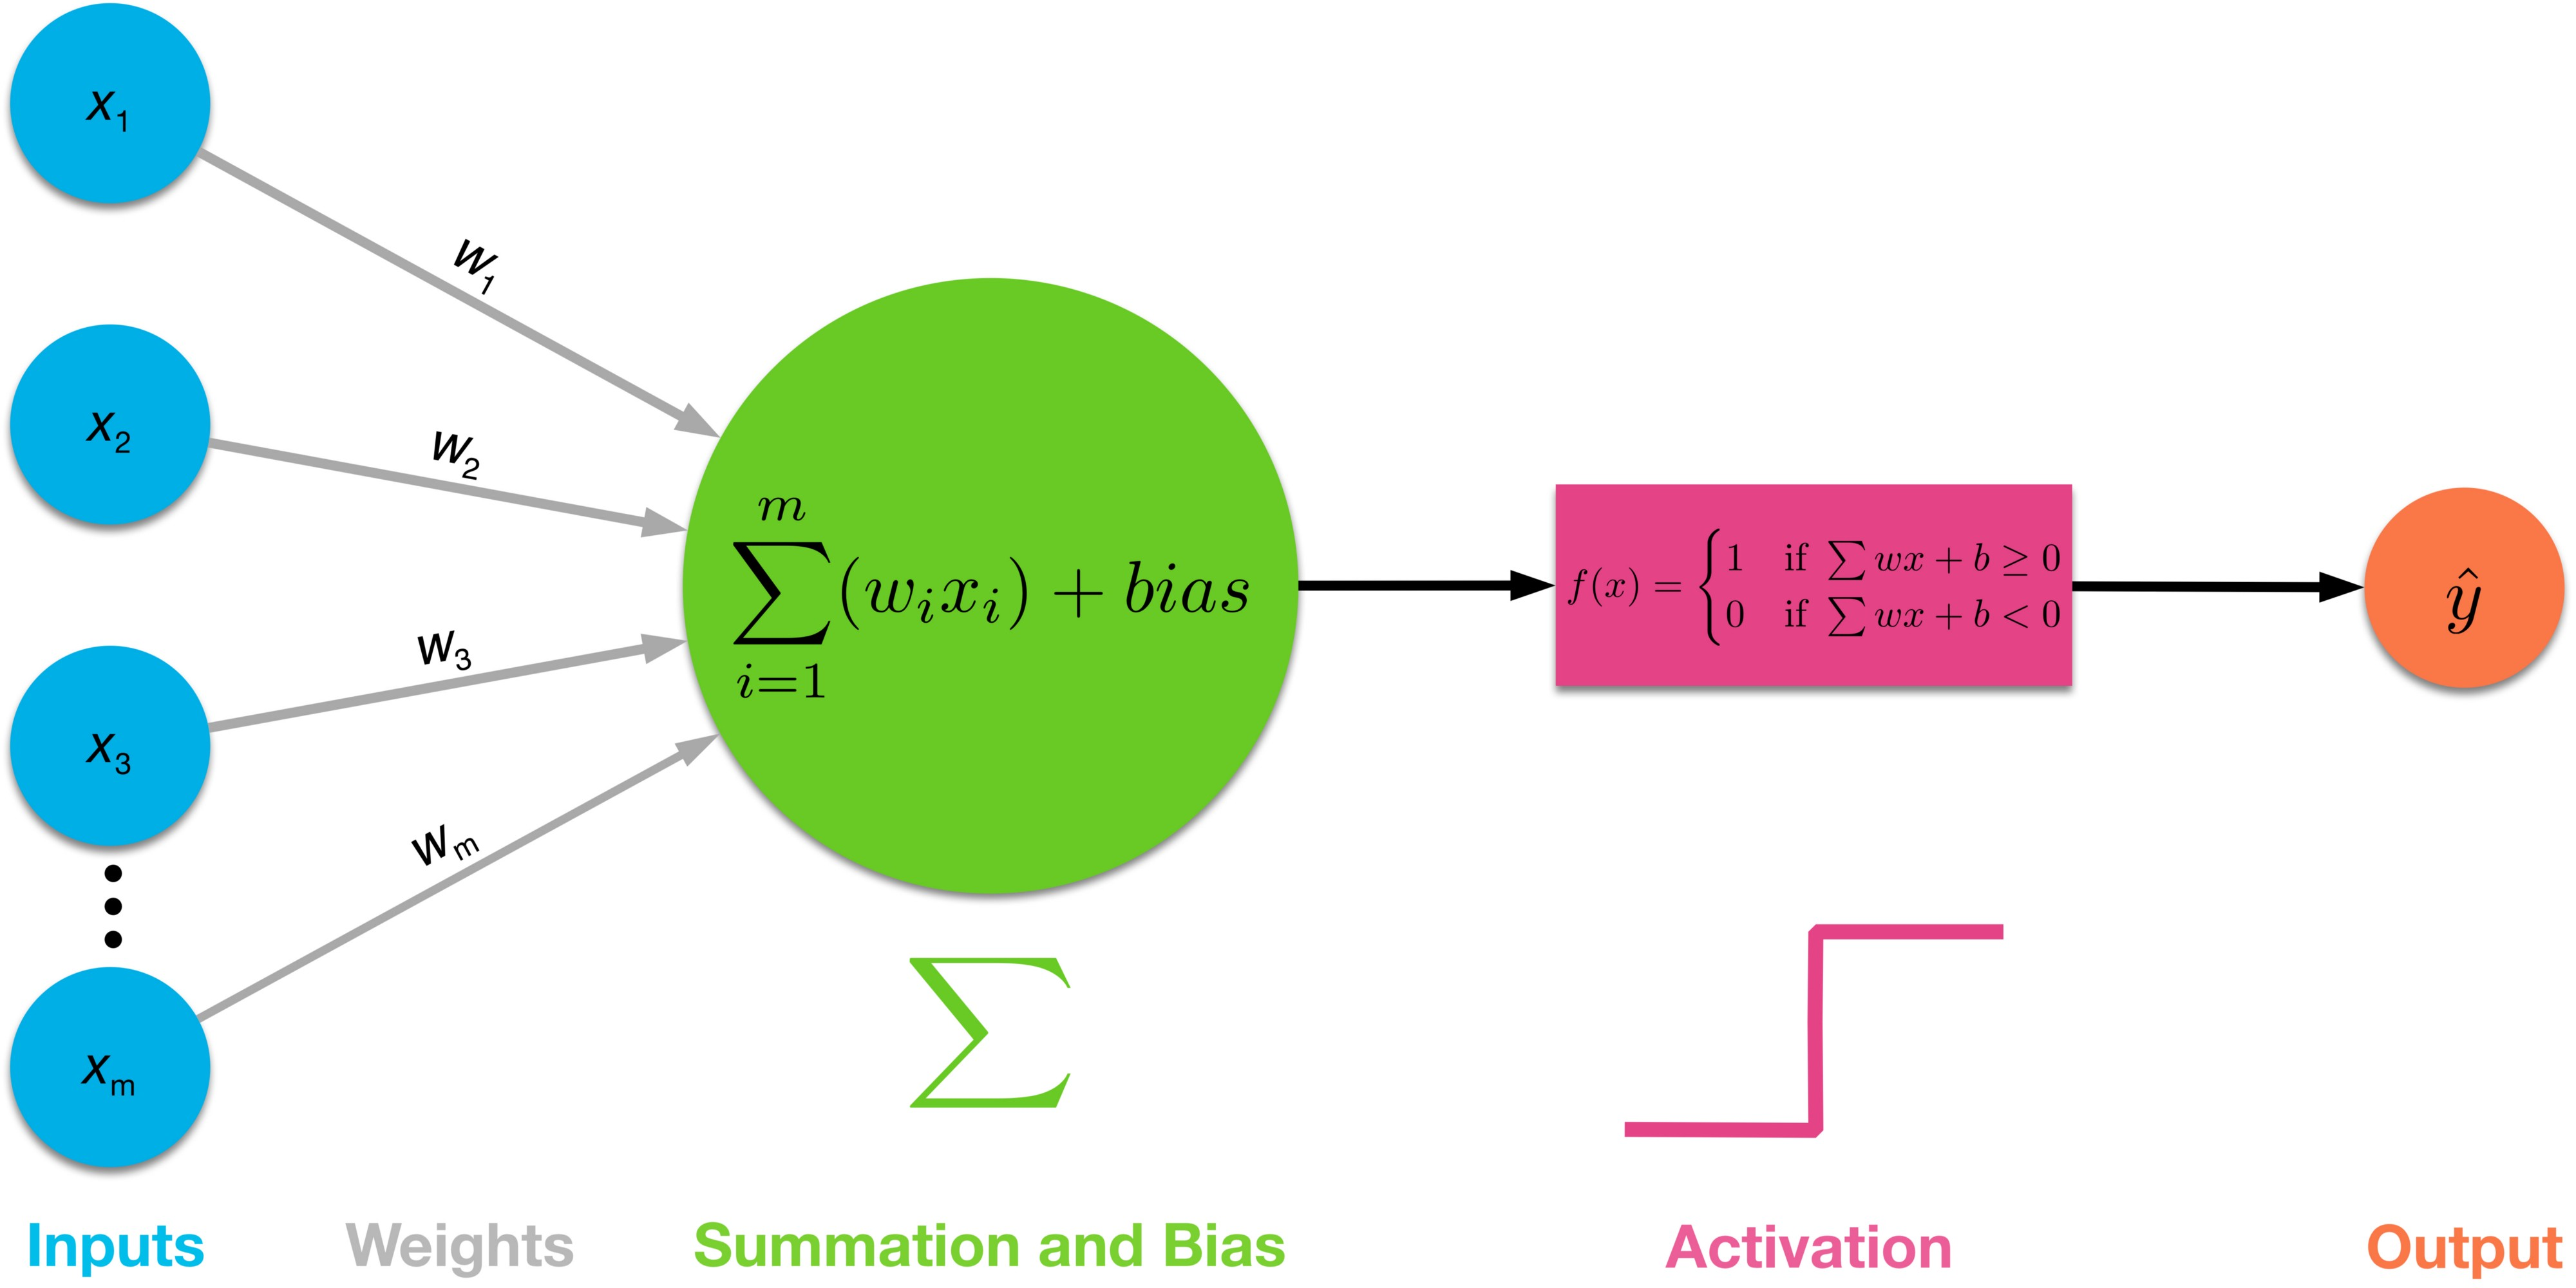

In [7]:
class Perceptron():

    def __init__(self, no_of_inputs, threshold=10000, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 2
        else:
          activation = 1         
        return activation
    def predict_batch(self,inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(summation>0,2,1)
    

    def train(self, training_inputs, labels):
                for _ in range(self.threshold):
                    for inputs, label in zip(training_inputs, labels):
                        prediction = self.predict(inputs)
                        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                        self.weights[0] += self.learning_rate * (label - prediction)


In [94]:
data=pd.read_csv("fun-data.csv")

In [95]:
data.head()

,f1,f2,f3,class
0,8.477937,0.436289,40.389470,1
1,6.704407,6.237227,65.349761,1
2,4.835130,4.500931,52.093300,1
3,5.179056,9.523951,79.049424,1
4,5.030426,4.569668,51.970028,1


In [10]:
data["class"].value_counts()

1    100
2    100
Name: class, dtype: int64

In [11]:
perceptron = Perceptron(no_of_inputs=3)
perceptron.train(data.iloc[:,:-1].values,np.array(data.iloc[:,-1]))

In [12]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

In [13]:
from sklearn import metrics

In [14]:
metrics.accuracy_score(perceptron.predict_batch(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

1.0

# PERCERPTRON FOR logisticdrawback.csv

In [15]:
from sklearn.linear_model import Perceptron

In [16]:
data=pd.read_csv("logisticdrawback.csv")

In [17]:
data

,f1,f2,class
0,-1.335474,1.376236,1
1,-1.918388,-0.528479,1
2,0.015120,0.020986,1
3,-0.131351,0.119043,1
4,0.794606,1.421984,1
...,...,...,...
295,-0.413737,-8.881763,3
296,-6.280134,4.969648,3
297,-0.946822,9.196240,3
298,-6.139916,5.699856,3


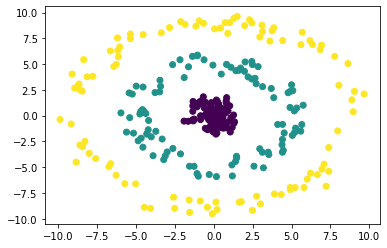

In [18]:
plt.scatter(data.f1,data.f2,c=data["class"])

In [19]:
model=Perceptron()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1] ,test_size=0.3, shuffle=True) 

In [21]:
model.fit(X_train,y_train)

Perceptron()

In [22]:
metrics.accuracy_score(model.predict(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

0.36333333333333334

In [23]:
data=pd.read_csv("logisticdrawback.csv")

In [24]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

# MLP

# logistic regression with mlp

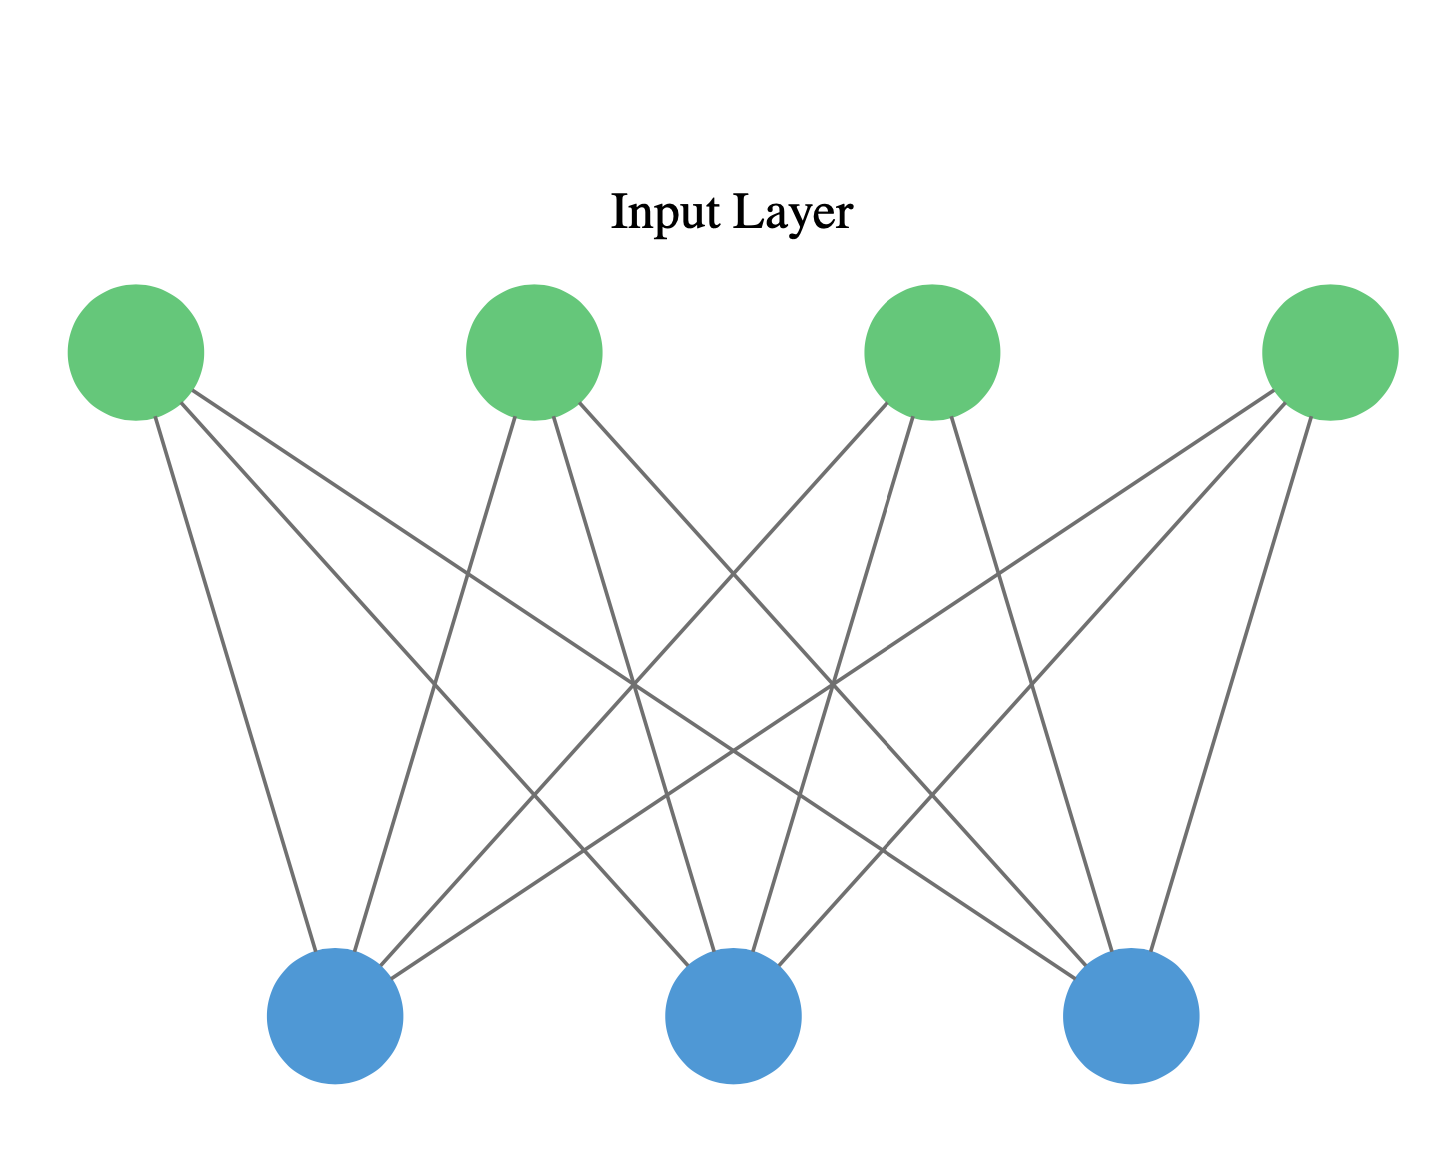

In [25]:
import seaborn as sns 
iris=sns.load_dataset("iris")
def f(x):
    if x=="setosa":
        return 0
    if x=="versicolor":
        return 1
    if x=="virginica":
        return 2
iris["species"]=iris["species"].apply(f)

In [26]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
import tensorflow as tf

# Generate dummy data
import numpy as np
# x_train = np.random.random((120, 4))
# y_train = keras.utils.to_categorical(np.random.randint(3, size=(120, 1)), num_classes=3)
# x_test = np.random.random((30, 4))
# y_test = keras.utils.to_categorical(np.random.randint(3, size=(30, 1)), num_classes=3)
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:4],iris.iloc[:,-1], test_size=0.2)
y__test = tf.keras.utils.to_categorical(y_test)
y__train = tf.keras.utils.to_categorical(y_train)


model = tf.keras.models.Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
#model.add(Dense(10, activation='relu',input_dim=4))


model.add(tf.keras.layers.Dense(3, activation='softmax',input_dim=4))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation='softmax'))

sgd =  tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train.values, y__train,
          epochs=20,
          batch_size=32)
score = model.evaluate(x_test, y__test)

Epoch 1/20
4/4 [==============================] - 0s 1ms/step - loss: 4.9330 - accuracy: 0.1417
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 2.2417 - accuracy: 0.3000
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 2.1952 - accuracy: 0.3500
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 1.5265 - accuracy: 0.3000
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 1.1133 - accuracy: 0.4000
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8884 - accuracy: 0.6750
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.7500 - accuracy: 0.6667
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7083
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 0.5701 - accuracy: 0.6750
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.5360 - accuracy: 0.7083
Epoch 11/20
4/4 [======================

In [28]:
score 

[0.394383043050766, 1.0]

In [29]:
metrics.accuracy_score(model.predict_classes(x_test),y_test)

1.0

In [30]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [31]:
weights

array([[ 0.8324351 ,  0.33314368, -0.12208263],
       [ 0.3439791 , -0.25098178, -0.70480657],
       [-1.4347445 ,  0.05239508,  0.80297714],
       [-1.009027  , -0.4158223 ,  0.05401839]], dtype=float32)

In [32]:
biases

array([ 0.18611583,  0.02520126, -0.21131717], dtype=float32)

In [33]:
model.predict_classes(x_test)

array([0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 1, 2, 0, 0, 1])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [35]:
l=LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression()

In [36]:
l.intercept_

array([ 10.00874756,   2.31791112, -12.32665868])

In [37]:
l.coef_

array([[-0.46698574,  0.77680003, -2.36283099, -0.95700032],
       [ 0.46231881, -0.36258474, -0.14922421, -0.89948197],
       [ 0.00466693, -0.41421529,  2.51205521,  1.85648229]])

In [38]:
l=LogisticRegression()
l.fit(x_train,y_train)
confusion_matrix(y_test,l.predict(x_test))

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  7]])

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# problems with traditional ann

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

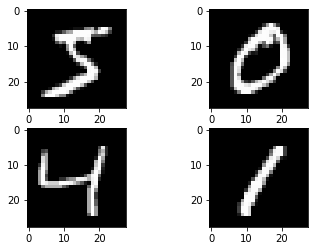

In [41]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [42]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [45]:
X_train.shape

(60000, 784)

In [46]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes =10

In [47]:
num_classes=10
num_pixels=784

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [49]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
59/59 [==============================] - 2s 37ms/step - loss: 0.4824 - accuracy: 0.8684 - val_loss: 0.2308 - val_accuracy: 0.9353
Epoch 2/10
59/59 [==============================] - 2s 33ms/step - loss: 0.1965 - accuracy: 0.9450 - val_loss: 0.1622 - val_accuracy: 0.9530
Epoch 3/10
59/59 [==============================] - 2s 31ms/step - loss: 0.1415 - accuracy: 0.9607 - val_loss: 0.1321 - val_accuracy: 0.9607
Epoch 4/10
59/59 [==============================] - 2s 32ms/step - loss: 0.1085 - accuracy: 0.9697 - val_loss: 0.1090 - val_accuracy: 0.9670
Epoch 5/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0857 - accuracy: 0.9762 - val_loss: 0.0950 - val_accuracy: 0.9715
Epoch 6/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0691 - accuracy: 0.9811 - val_loss: 0.0857 - val_accuracy: 0.9738
Epoch 7/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0573 - accuracy: 0.9845 - val_loss: 0.0766 - val_accuracy: 0.9769
Epoch 8/10
59

In [53]:
(X_train1, y_train), (X_test1, y_test) = tf.keras.datasets.mnist.load_data()


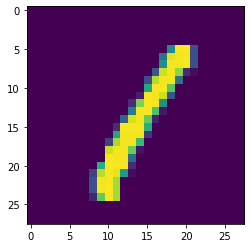

In [84]:
pic=np.zeros((28,28))
pic=X_train1[3,:,:].copy()
pic2=X_train1[3,:,:].copy()
plt.imshow(pic)

In [85]:
np.argmax(model.predict(pic.reshape(1,784)))

1

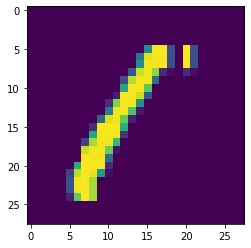

In [86]:
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+3]
plt.imshow(pic)

In [87]:
np.argmax(model.predict(pic.reshape(1,784)))

0

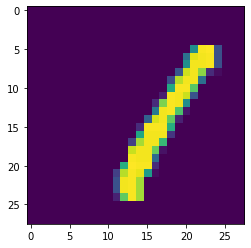

In [88]:
pic=np.zeros((28,28))

for i in range(pic.shape[0]):
  if  (i<25):
    pic[:,i+3]=pic2[:,i]
plt.imshow(pic)

In [89]:
np.argmax(model.predict(pic.reshape(1,784)))

4

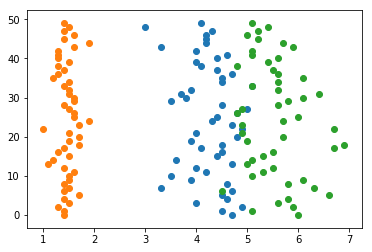

In [45]:
# plt.scatter(iris[iris["species"]==1].iloc[:,2],range(50))
# plt.scatter(iris[iris["species"]==0].iloc[:,2],range(50))
# plt.scatter(iris[iris["species"]==2].iloc[:,2],range(50))

neural networks .ipynb


In [132]:


class CharacterTable(object):
    """Given a set of characters:
    + Encode them to a one-hot integer representation
    + Decode the one-hot or integer representation to their character output
    + Decode a vector of probabilities to their character output
    """
    def __init__(self, chars):
        """Initialize character table.

        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One-hot encode given string C.

        # Arguments
            C: string, to be encoded.
            num_rows: Number of rows in the returned one-hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        """Decode the given vector or 2D array to their character output.

        # Arguments
            x: A vector or a 2D array of probabilities or one-hot representations;
                or a vector of character indices (used with `calc_argmax=False`).
            calc_argmax: Whether to find the character index with maximum
                probability, defaults to `True`.
        """
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)


class colors:
    ok = '\033[92m'
    fail = '\033[91m'
    close = '\033[0m'

# Parameters for the model and dataset.
TRAINING_SIZE = 50000
DIGITS = 3
REVERSE = True

# Maximum length of input is 'int + int' (e.g., '345+678'). Maximum length of
# int is DIGITS.
MAXLEN = DIGITS + 1 + DIGITS

# All the numbers, plus sign and space for padding.
chars = '0123456789+ '
ctable = CharacterTable(chars)

questions = []
expected = []
seen = set()
print('Generating data...')
while len(questions) < TRAINING_SIZE:
    f = lambda: int(''.join(np.random.choice(list('0123456789'))
                    for i in range(np.random.randint(1, DIGITS + 1))))
    a, b = f(), f()
    # Skip any addition questions we've already seen
    # Also skip any such that x+Y == Y+x (hence the sorting).
    key = tuple(sorted((a, b)))
    if key in seen:
        continue
    seen.add(key)
    # Pad the data with spaces such that it is always MAXLEN.
    q = '{}+{}'.format(a, b)
    query = q + ' ' * (MAXLEN - len(q))
    ans = str(a + b)
    # Answers can be of maximum size DIGITS + 1.
    ans += ' ' * (DIGITS + 1 - len(ans))
    if REVERSE:
        # Reverse the query, e.g., '12+345  ' becomes '  543+21'. (Note the
        # space used for padding.)
        query = query[::-1]
    questions.append(query)
    expected.append(ans)
print('Total addition questions:', len(questions))

print('Vectorization...')
x = np.zeros((len(questions), MAXLEN, len(chars)), dtype=np.bool)
y = np.zeros((len(questions), DIGITS + 1, len(chars)), dtype=np.bool)
for i, sentence in enumerate(questions):
    x[i] = ctable.encode(sentence, MAXLEN)
for i, sentence in enumerate(expected):
    y[i] = ctable.encode(sentence, DIGITS + 1)

# Shuffle (x, y) in unison as the later parts of x will almost all be larger
# digits.
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# Explicitly set apart 10% for validation data that we never train over.
split_at = len(x) - len(x) // 10
(x_train, x_val) = x[:split_at], x[split_at:]
(y_train, y_val) = y[:split_at], y[split_at:]

print('Training Data:')
print(x_train.shape)
print(y_train.shape)

print('Validation Data:')
print(x_val.shape)
print(y_val.shape)


Generating data...
Total addition questions: 50000
Vectorization...
Training Data:
(45000, 7, 12)
(45000, 4, 12)
Validation Data:
(5000, 7, 12)
(5000, 4, 12)


In [138]:
y_train[0]

array([[False, False, False, False, False,  True, False, False, False,
        False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False]])

In [156]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100

num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0002, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [157]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [158]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_da09-ta=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 132s 3ms/step - loss: 2.8593 - acc: 0.3388 - val_loss: 1.5602 - val_acc: 0.4382
Epoch 2/100
50000/50000 [==============================] - 132s 3ms/step - loss: 1.4436 - acc: 0.4860 - val_loss: 1.2979 - val_acc: 0.5472
Epoch 3/100
50000/50000 [==============================] - 132s 3ms/step - loss: 1.3075 - acc: 0.5405 - val_loss: 1.2216 - val_acc: 0.5789
Epoch 4/100
50000/50000 [==============================] - 133s 3ms/step - loss: 1.2192 - acc: 0.5766 - val_loss: 1.1084 - val_acc: 0.6208
Epoch 5/100
50000/50000 [==============================] - 136s 3ms/step - loss: 1.1589 - acc: 0.6017 - val_loss: 1.1252 - val_acc: 0.6121
Epoch 6/100
50000/50000 [==============================] - 137s 3ms/step - loss: 1.1090 - acc: 0.6186 - val_loss: 1.0682 - val_acc: 0.6354
Epoch 7/100
50000/50000 [==============================] - 131s 3ms/step - loss: 1.0696 - acc: 0.6332 - val_loss: 1.

In [ ]:
model.

In [149]:
model_path = os.path.join(save_dir, model_name)
model.save("bchjdbhj")
print('Saved trained model at %s ' % model_path)


Saved trained model at /Users/smanda41/personal/saved_models/keras_cifar10_trained_model.h5 


In [217]:
cd\..

/Users/smanda41


In [ ]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model,view=True, title="")